# Introduksjon til sannsynlighet og statistikk
I denne notatboken skal vi utforske noen av konseptene vi har diskutert tidligere. Mange konsepter fra sannsynlighet og statistikk er godt representert i store biblioteker for databehandling i Python, som `numpy` og `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Tilfeldige Variabler og Fordelinger
La oss starte med å trekke et utvalg på 30 verdier fra en uniform fordeling fra 0 til 9. Vi vil også beregne gjennomsnitt og varians.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


For å visuelt anslå hvor mange forskjellige verdier som finnes i utvalget, kan vi plotte **histogrammet**:


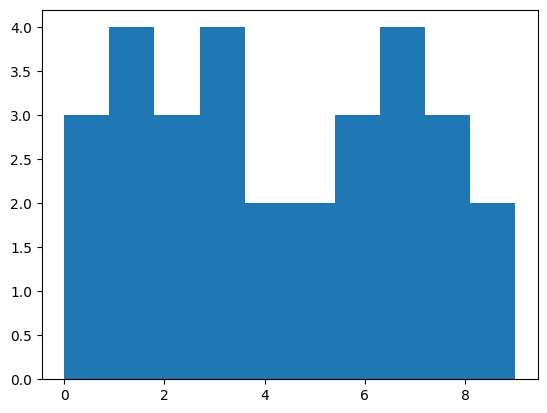

In [119]:
plt.hist(sample)
plt.show()

## Analysere ekte data

Gjennomsnitt og varians er svært viktige når man analyserer data fra virkeligheten. La oss laste inn data om baseballspillere fra [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Vi bruker en pakke som heter [**Pandas**](https://pandas.pydata.org/) her for dataanalyse. Vi skal snakke mer om Pandas og arbeid med data i Python senere i dette kurset.

La oss beregne gjennomsnittsverdier for alder, høyde og vekt:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

La oss nå fokusere på høyde, og beregne standardavvik og varians:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


I tillegg til gjennomsnitt, er det fornuftig å se på medianverdien og kvartilene. De kan visualiseres ved hjelp av et **boksplott**:


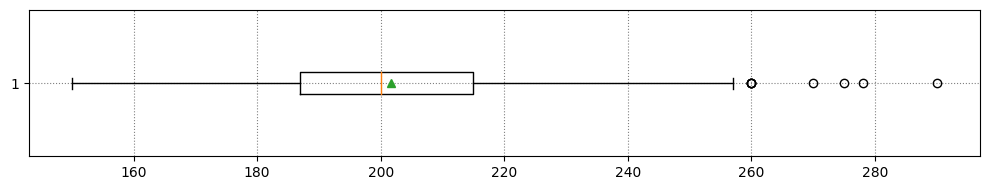

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Vi kan også lage boksplott av undergrupper av datasettet vårt, for eksempel gruppert etter spillerrolle.


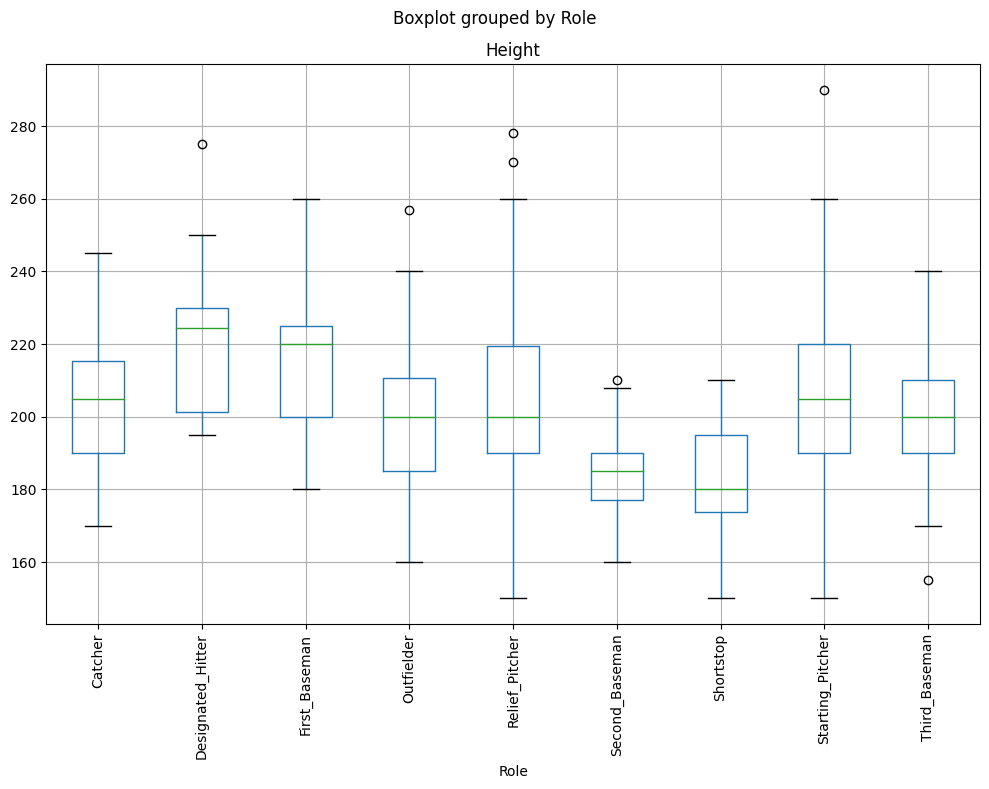

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Merk**: Dette diagrammet antyder at gjennomsnittlig høyde på førstemenn er høyere enn høyden på andremenn. Senere skal vi lære hvordan vi kan teste denne hypotesen mer formelt, og hvordan vi kan demonstrere at dataene våre er statistisk signifikante for å vise dette.

Alder, høyde og vekt er alle kontinuerlige tilfeldige variabler. Hva tror du deres fordeling er? En god måte å finne ut av det på er å lage et histogram av verdiene:


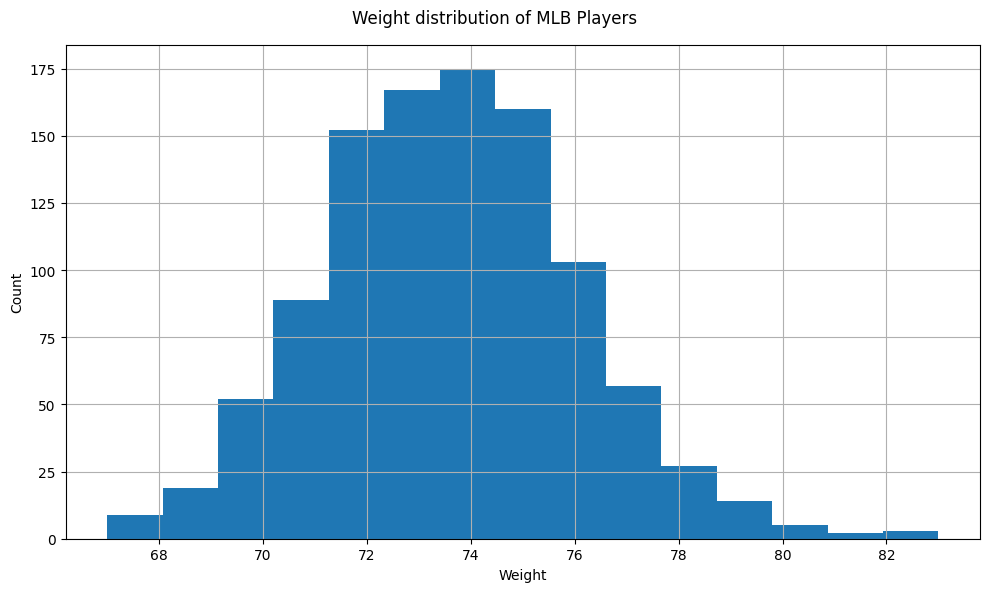

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalfordeling

La oss lage et kunstig utvalg av vekter som følger en normalfordeling med samme gjennomsnitt og varians som våre virkelige data:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

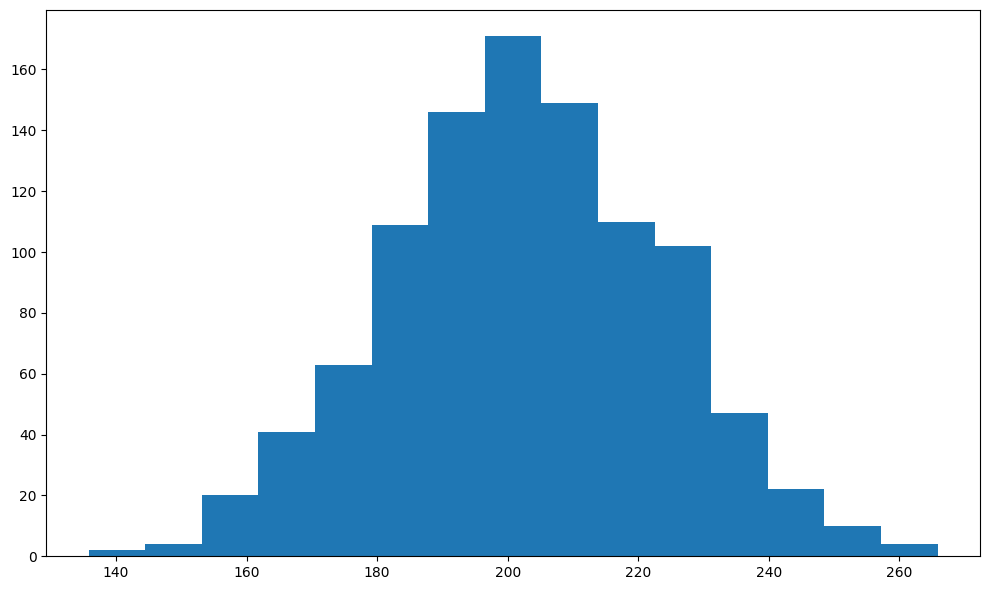

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

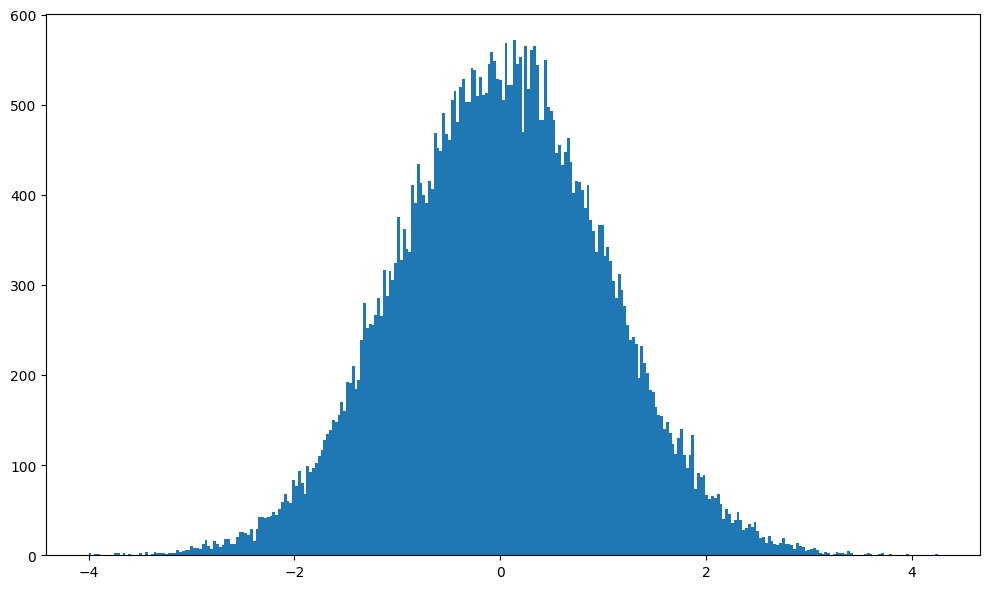

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Siden de fleste verdier i det virkelige liv er normalfordelte, bør vi ikke bruke en uniform tilfeldig tallgenerator for å generere eksempeldata. Her er hva som skjer hvis vi prøver å generere vekter med en uniform fordeling (generert av `np.random.rand`):


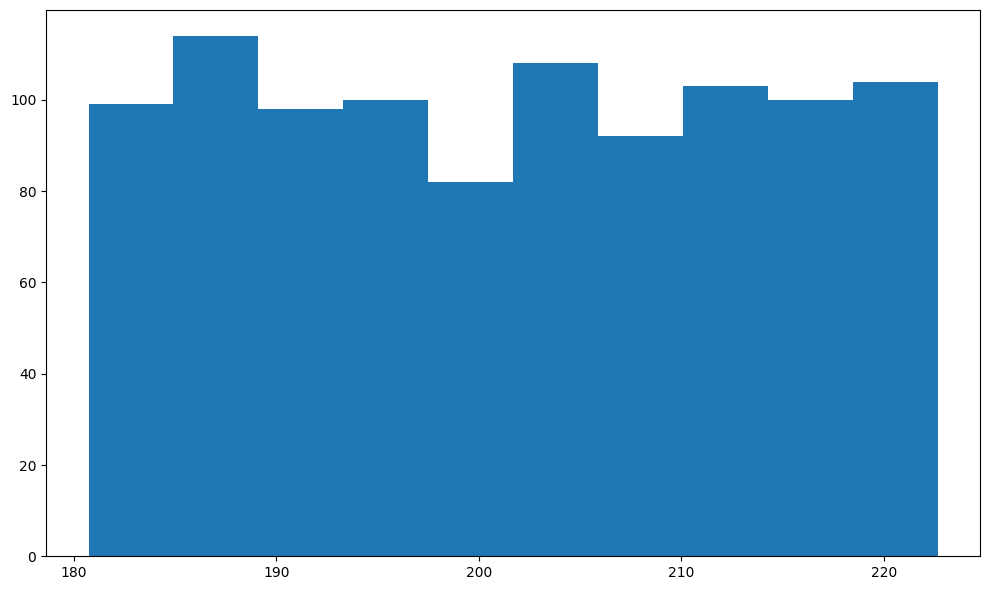

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Konfidensintervaller

La oss nå beregne konfidensintervaller for vekten og høyden til baseballspillere. Vi vil bruke koden [fra denne stackoverflow-diskusjonen](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hypotesetesting

La oss utforske de ulike rollene i datasettet vårt for baseballspillere:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Vi kan se at intervallene ikke overlapper.

En statistisk mer korrekt måte å bevise hypotesen på er å bruke en **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


De to verdiene som returneres av `ttest_ind`-funksjonen er:  
* p-verdi kan betraktes som sannsynligheten for at to fordelinger har samme gjennomsnitt. I vårt tilfelle er den veldig lav, noe som betyr at det er sterke bevis for at førstemenn er høyere.  
* t-verdi er den mellomliggende verdien av normalisert gjennomsnittsforskjell som brukes i t-testen, og den sammenlignes med en terskelverdi for en gitt konfidensverdi.  


## Simulere en normalfordeling med sentralgrenseteoremet

Den pseudotilfeldige generatoren i Python er designet for å gi oss en uniform fordeling. Hvis vi ønsker å lage en generator for normalfordeling, kan vi bruke sentralgrenseteoremet. For å få en normalfordelt verdi, beregner vi bare gjennomsnittet av et uniform-generert utvalg.


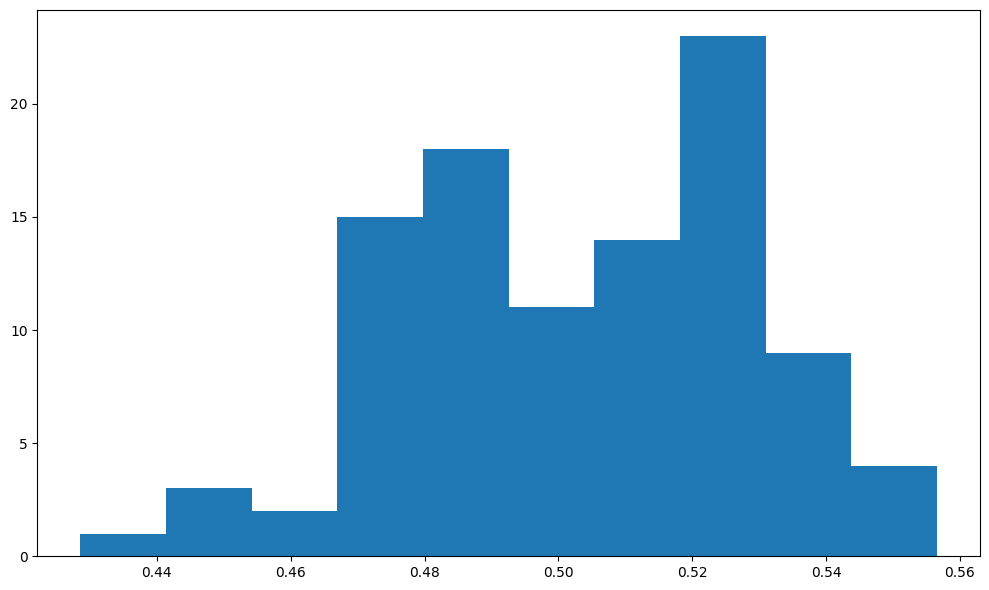

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korrelasjon og Ond Baseball Corp

Korrelasjon lar oss finne sammenhenger mellom datasett. I vårt enkle eksempel, la oss late som det finnes et ondt baseballselskap som betaler spillerne sine basert på høyde – jo høyere spilleren er, desto mer penger får han/hun. Anta at det finnes en grunnlønn på $1000, og en ekstra bonus fra $0 til $100, avhengig av høyde. Vi skal ta de ekte spillerne fra MLB og beregne deres imaginære lønninger:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


La oss nå beregne kovarians og korrelasjon for disse sekvensene. `np.cov` vil gi oss en såkalt **kovariansmatrise**, som er en utvidelse av kovarians til flere variabler. Elementet $M_{ij}$ i kovariansmatrisen $M$ er en korrelasjon mellom inngangsvariablene $X_i$ og $X_j$, og diagonalverdiene $M_{ii}$ er variansen til $X_{i}$. På samme måte vil `np.corrcoef` gi oss **korrelasjonsmatrisen**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


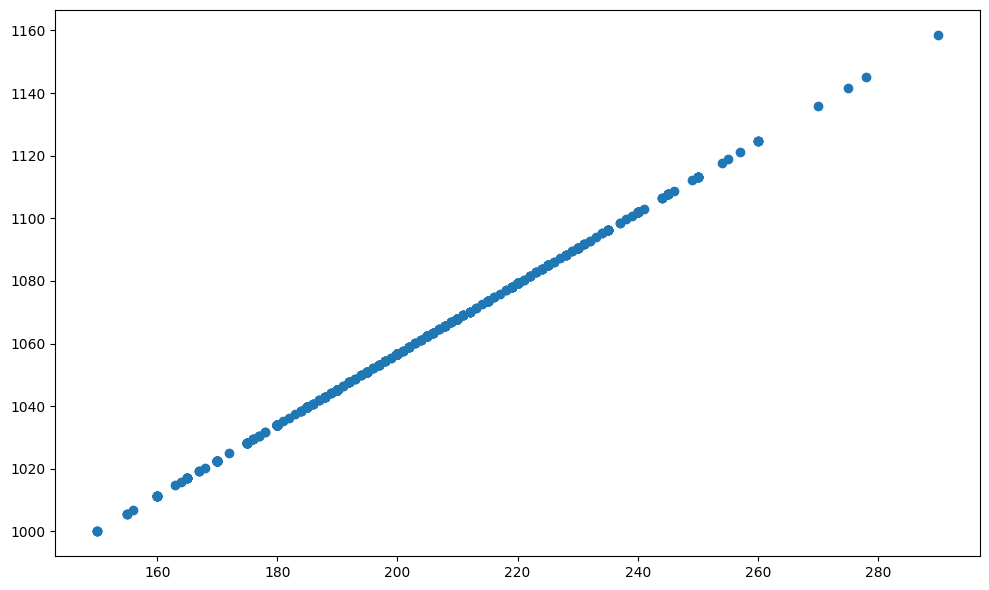

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


I dette tilfellet er korrelasjonen litt mindre, men den er fortsatt ganske høy. Nå, for å gjøre sammenhengen enda mindre åpenbar, kan vi legge til litt ekstra tilfeldighet ved å legge til en tilfeldig variabel til lønnen. La oss se hva som skjer:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


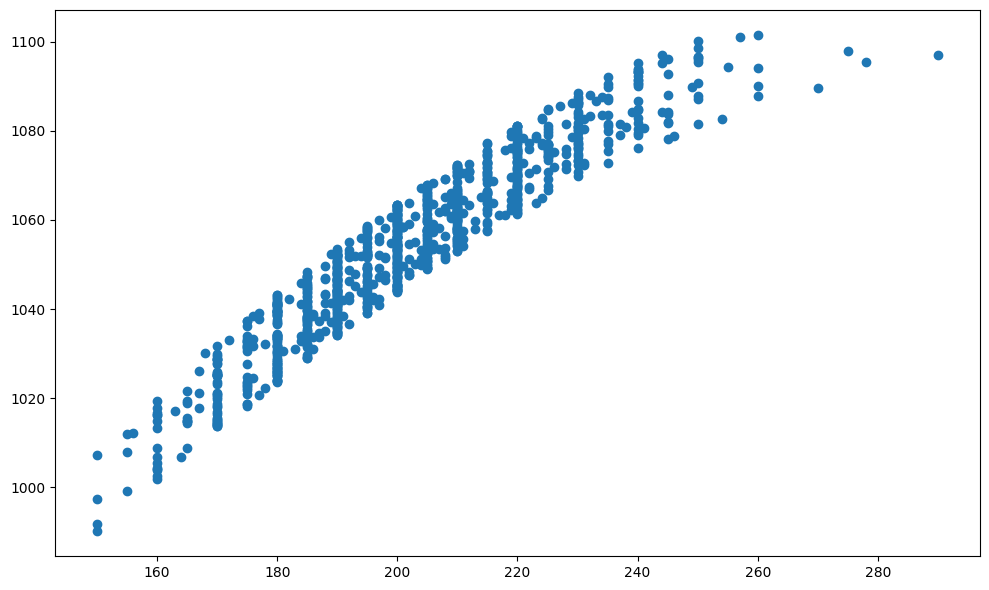

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Kan du gjette hvorfor prikkene danner vertikale linjer på denne måten?

Vi har observert sammenhengen mellom et kunstig konstruert konsept som lønn og den observerte variabelen *høyde*. La oss også se om de to observerte variablene, som høyde og vekt, korrelerer:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Dessverre fikk vi ingen resultater - bare noen merkelige `nan`-verdier. Dette skyldes at noen av verdiene i serien vår er udefinerte, representert som `nan`, noe som fører til at resultatet av operasjonen også blir udefinert. Ved å se på matrisen kan vi se at `Weight` er den problematiske kolonnen, fordi selvkorrelasjonen mellom `Height`-verdier har blitt beregnet.

> Dette eksempelet viser hvor viktig **datapreparering** og **rengjøring** er. Uten skikkelige data kan vi ikke beregne noe som helst.

La oss bruke `fillna`-metoden for å fylle inn de manglende verdiene, og beregne korrelasjonen:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

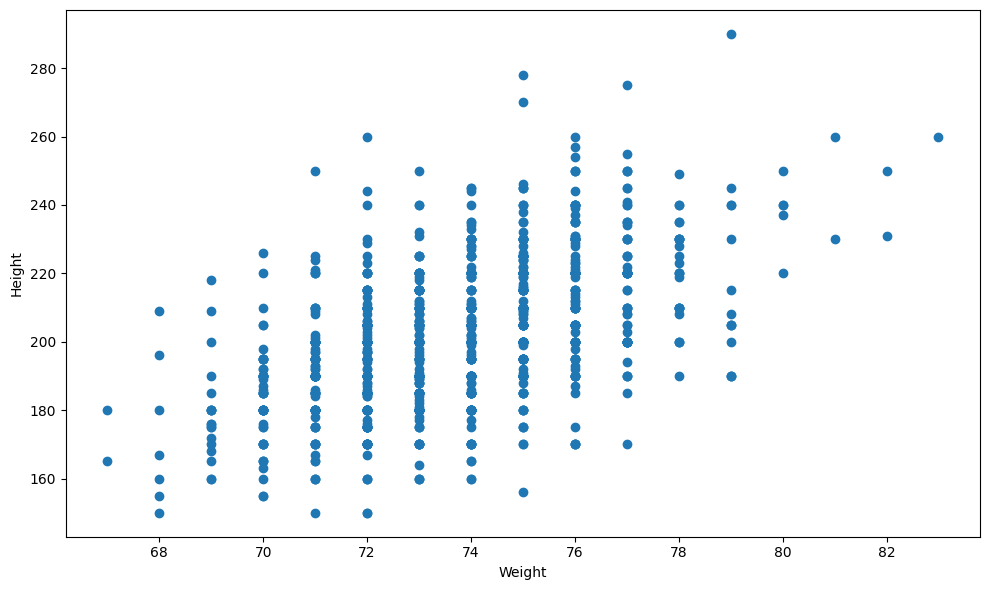

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Konklusjon

I denne notatboken har vi lært hvordan vi utfører grunnleggende operasjoner på data for å beregne statistiske funksjoner. Vi vet nå hvordan vi bruker et solid apparat av matematikk og statistikk for å bevise noen hypoteser, og hvordan vi beregner konfidensintervaller for vilkårlige variabler gitt et datasett.



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi tilstreber nøyaktighet, vennligst vær oppmerksom på at automatiske oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
